Importing Libraries

In [3]:
!pip install xgboost

In [4]:
import pandas as pd
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

Data Preprocessing

In [6]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
for i in df:
    print(f"Column '{i}' has type: {type(df[i])}")

Column 'customerID' has type: <class 'pandas.core.series.Series'>
Column 'gender' has type: <class 'pandas.core.series.Series'>
Column 'SeniorCitizen' has type: <class 'pandas.core.series.Series'>
Column 'Partner' has type: <class 'pandas.core.series.Series'>
Column 'Dependents' has type: <class 'pandas.core.series.Series'>
Column 'tenure' has type: <class 'pandas.core.series.Series'>
Column 'PhoneService' has type: <class 'pandas.core.series.Series'>
Column 'MultipleLines' has type: <class 'pandas.core.series.Series'>
Column 'InternetService' has type: <class 'pandas.core.series.Series'>
Column 'OnlineSecurity' has type: <class 'pandas.core.series.Series'>
Column 'OnlineBackup' has type: <class 'pandas.core.series.Series'>
Column 'DeviceProtection' has type: <class 'pandas.core.series.Series'>
Column 'TechSupport' has type: <class 'pandas.core.series.Series'>
Column 'StreamingTV' has type: <class 'pandas.core.series.Series'>
Column 'StreamingMovies' has type: <class 'pandas.core.serie

Data Type conversion

In [8]:
# Step 1: Convert the 'TotalCharges' column to numeric (handle errors gracefully)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 2: Handle missing values (if any exist)
df['TotalCharges'].fillna(0, inplace=True)  # Replace NaN with 0 (or any value you prefer)

# Step 3: Convert 'TotalCharges' to integer
df['TotalCharges'] = df['TotalCharges'].astype(int)

# Check the result
print(df['TotalCharges'].dtypes)  # Should now be int
print(df.head())  # View the first few rows to check the conversion

int64
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contrac

C:\Users\user\AppData\Local\Temp\ipykernel_9188\353444100.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)  # Replace NaN with 0 (or any value you prefer)


Checking for the null values

In [9]:
for i in df:
    print(df[i].isnull().sum())
    print(df.duplicated().sum()  # Returns the number of duplicate rows
)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Checking Outliers

In [10]:
from scipy import stats
z_scores = stats.zscore(df["MonthlyCharges"])
df_outliers = df[(z_scores > 3) | (z_scores < -3)]
df_outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
from scipy import stats
z_scores_1 = stats.zscore(df["TotalCharges"])
df_outliers = df[(z_scores_1 > 3) | (z_scores_1 < -3)]
df_outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
Q1 = df["MonthlyCharges"].quantile(0.25)
Q3 = df["MonthlyCharges"].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df_outliers = df[(df["MonthlyCharges"] < lower_bound) | (df["MonthlyCharges"] > upper_bound)]
print(df_outliers)
outliers_count = df_outliers.shape[0]  # Number of rows with outliers
print(f"Number of outliers: {outliers_count}")

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Number of outliers: 0


In [13]:
Q1 = df["TotalCharges"].quantile(0.25)
Q3 = df["TotalCharges"].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df_outliers = df[(df["TotalCharges"] < lower_bound) | (df["TotalCharges"] > upper_bound)]
print(df_outliers)
outliers_count = df_outliers.shape[0]  # Number of rows with outliers
print(f"Number of outliers: {outliers_count}")

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Number of outliers: 0


In [14]:
df = df.drop(columns=["customerID"])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306,Yes


Convert categorical columns into nemerical

In [15]:
columns_to_encode = ['gender', 'Partner', 'Dependents' , 'PhoneService' , 'InternetService' ,'OnlineSecurity' ,  'OnlineBackup' ,  'PaperlessBilling', 'DeviceProtection' , 'TechSupport' , 'StreamingTV' ,'StreamingMovies' , 'Contract' , 'PaymentMethod' ,'MultipleLines' ,  'Churn' ]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in the list
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [16]:
import pandas as pd

# Set option to display all columns without truncation
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [17]:
# Check the data types of each column in the DataFrame
print(df.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object


In [18]:
unique_values = df['MultipleLines'].unique()

# Print the unique values
print(unique_values)

[1 0 2]


In [19]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns only
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   

In [20]:
# Calculate the correlation matrix for all numerical columns
correlation_matrix = df.corr()

# Get the correlation of all features with the target column (e.g., 'Churn' or 'Target')
correlation_with_target = correlation_matrix['Churn'].sort_values(ascending=False)

# Print the correlation of each feature with the target
print(correlation_with_target)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198326
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


Correalations each column into target variable

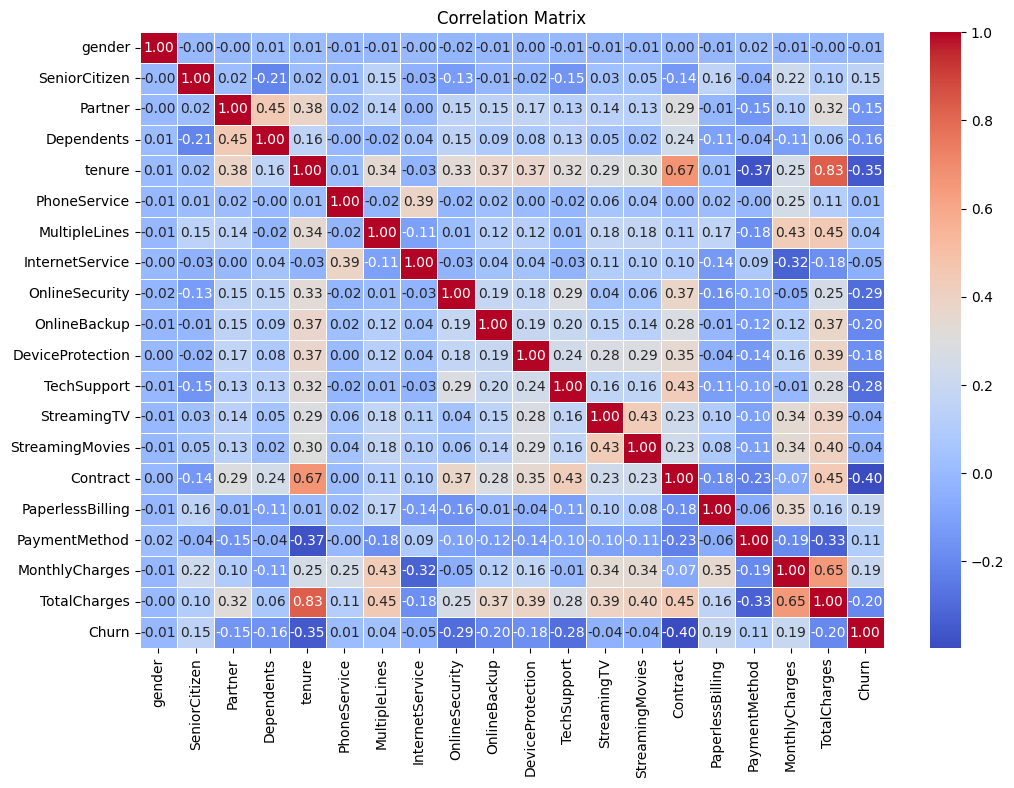

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Dropping features which contain less correalation

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of each feature with the target column 'Churn'
correlation_with_target = correlation_matrix['Churn'].sort_values(ascending=False)

# Filter columns with correlation between -0.01 and 0.01 (both inclusive)
low_correlation_columns = correlation_with_target[(abs(correlation_with_target) >= 0) & (abs(correlation_with_target) <= 0.02)].index.tolist()

# Remove these columns from the DataFrame
df_cleaned = df.drop(columns=low_correlation_columns)

# Print the columns that are removed
print(f"Columns removed (correlation between -0.01 and 0.01): {low_correlation_columns}")

# Display the cleaned DataFrame
print(df_cleaned)

Columns removed (correlation between -0.01 and 0.01): ['PhoneService', 'gender']
      SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0                 0        1           0       1              1   
1                 0        0           0      34              0   
2                 0        0           0       2              0   
3                 0        0           0      45              1   
4                 0        0           0       2              0   
...             ...      ...         ...     ...            ...   
7038              0        1           1      24              2   
7039              0        1           1      72              2   
7040              0        1           1      11              1   
7041              1        1           0       4              2   
7042              0        0           0      66              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0    

In [23]:
df_cleaned.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

Checking bias each unique values in features

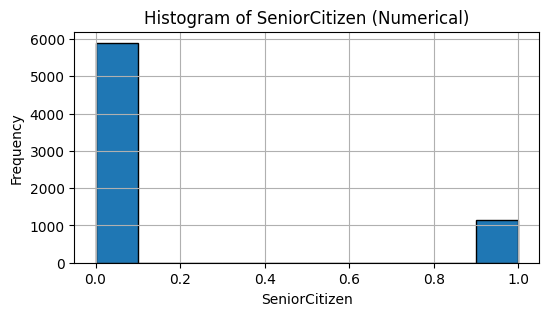

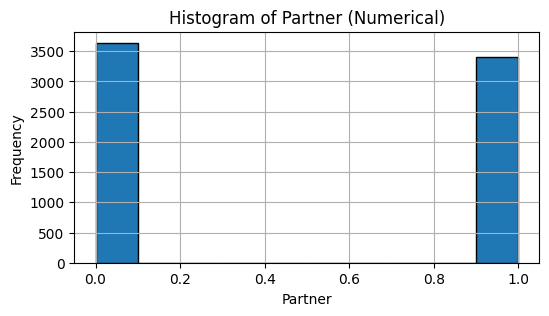

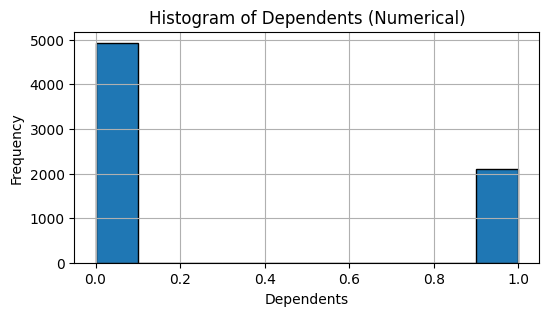

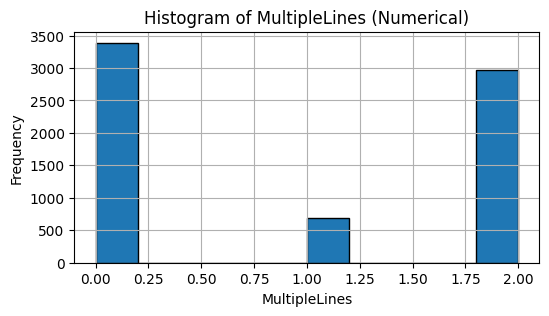

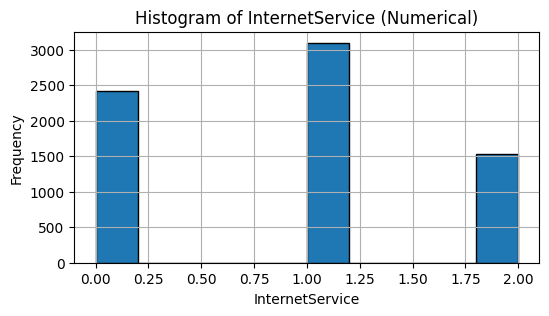

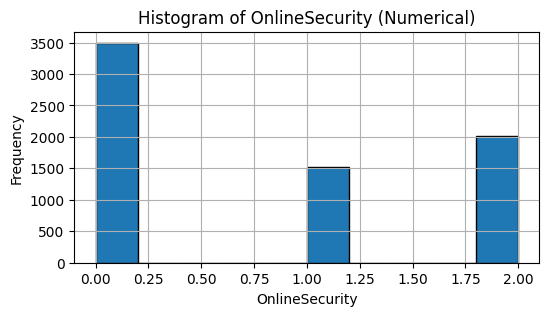

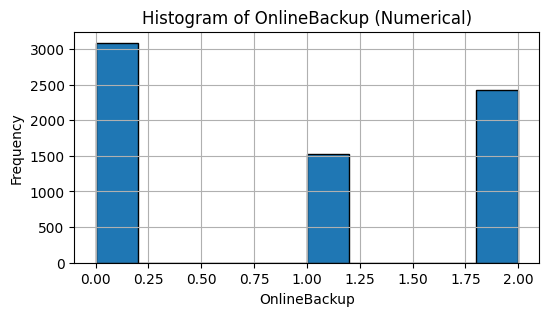

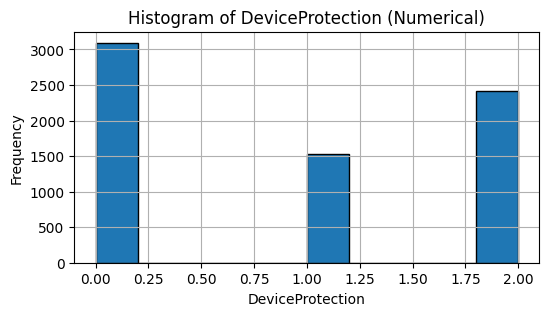

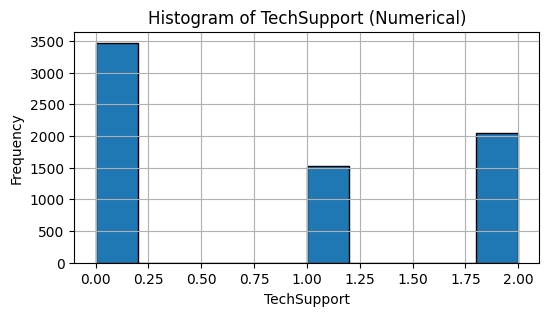

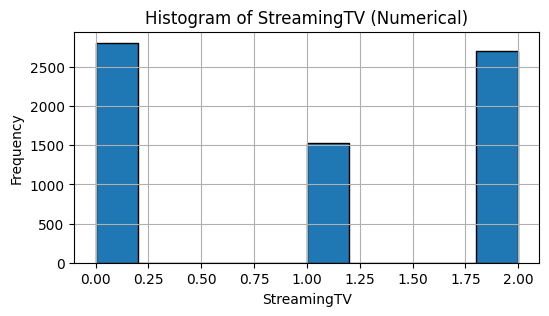

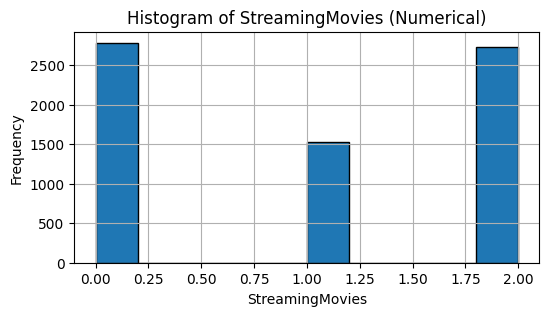

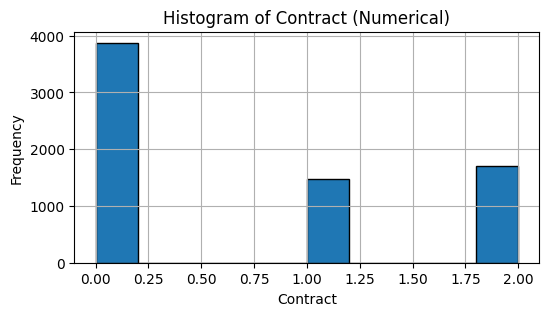

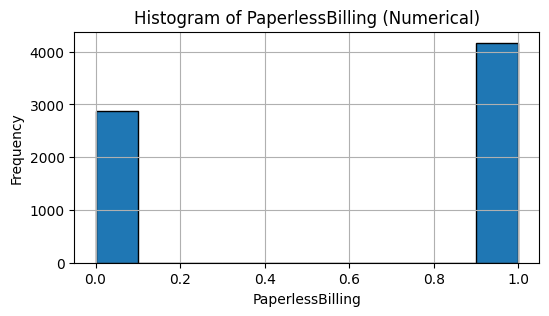

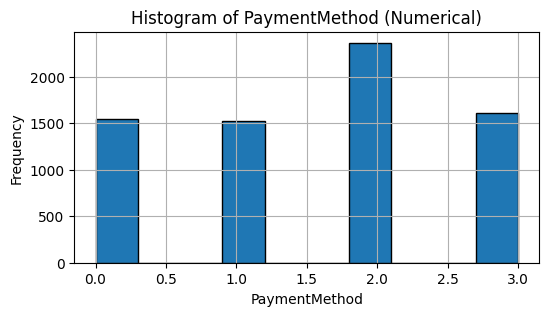

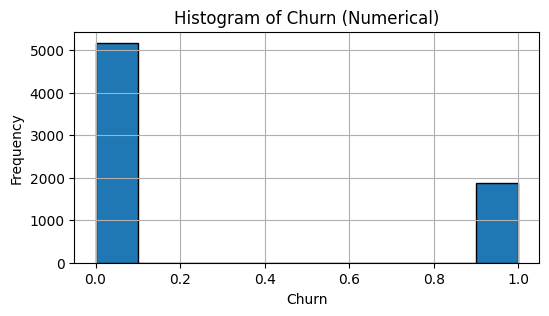

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to generate histograms for
columns_to_plot = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                   'PaymentMethod', 'Churn']

# Loop through the list of column names
for column in columns_to_plot:
    plt.figure(figsize=(6, 3))
    
    # If the column is categorical, use value counts for the histogram
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Histogram of {column} (Categorical)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # If the column is numerical, plot a histogram
        df[column].hist(bins=10, edgecolor='black')
        plt.title(f'Histogram of {column} (Numerical)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.show()

In [25]:
# Calculate the percentage distribution of '1' and '0' in the 'Churn' column
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

# Print the percentage distribution
print("Percentage distribution of 'Churn' (1 and 0):")
print(churn_percentage)

Percentage distribution of 'Churn' (1 and 0):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [26]:
from sklearn.model_selection import train_test_split

# X: Feature matrix (all columns except the target)
# y: Target variable (e.g., 'Churn')
X = df.drop(columns=['Churn'])  # Replace 'Churn' with your target column name
y = df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training data shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing data shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

Training data shape (X_train, y_train): (5634, 19), (5634,)
Testing data shape (X_test, y_test): (1409, 19), (1409,)


In [27]:
# Check the distribution of 0's and 1's in y_train
value_counts_train = y_train.value_counts()

# Print the value counts (number of 0's and 1's)
print(f"Class distribution in y_train:\n{value_counts_train}")

# Optionally, print the percentage distribution
percentage_distribution = (value_counts_train / len(y_train)) * 100
print(f"Percentage distribution in y_train:\n{percentage_distribution}")

Class distribution in y_train:
Churn
0    4138
1    1496
Name: count, dtype: int64
Percentage distribution in y_train:
Churn
0    73.446929
1    26.553071
Name: count, dtype: float64


Smoothing techniques

In [28]:
!pip install imbalanced-learn

In [29]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Class distribution after SMOTE:\n{pd.Series(y_resampled).value_counts(normalize=True) * 100}")

Class distribution after SMOTE:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


In [30]:
X_resampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.850000,1336
1,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.200000,5129
2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.450000,23
3,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.200000,237
4,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,0,0,0,0,5,1,0,1,0,0,0,0,2,1,0,1,1,88.121375,451
8272,0,0,0,0,44,1,0,1,0,0,1,0,0,2,0,1,1,90.725171,4047
8273,0,0,0,0,35,1,2,1,0,1,1,0,2,1,0,1,2,101.603909,3547
8274,0,0,0,0,44,0,0,1,0,0,0,1,0,0,0,0,1,20.891535,932


Model training and Hyperparameter tuning

In [31]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [32]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'lambda': [0, 1, 10],
    'alpha': [0, 1, 10]
}

In [33]:
grid_search = GridSearchCV(
    estimator=clf_xgb,
    param_grid=param_grid,
    scoring='accuracy',  # You can also use 'roc_auc' or other metrics depending on your task
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all CPUs for parallelization
)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 1, 10],
                         'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3], 'lambda': [0, 1, 10],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [34]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'alpha': 10, 'colsample_bytree': 0.7, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [35]:
# Best hyperparameters from grid search
best_params = {
    'alpha': 1,
    'colsample_bytree': 0.7,
    'gamma': 0.1,
    'lambda': 10,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 1
}

# Initialize the XGBoost classifier with best parameters
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    missing=np.nan,
    seed=42,
    **best_params  # Use the best parameters from grid search
)

In [36]:
# Train the model on your resampled data
clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  # You can keep validation set for early stopping
    # early_stopping_rounds=10,  # Stop early if no improvement
    verbose=True
)

[0]	validation_0-logloss:0.55642
[1]	validation_0-logloss:0.53749
[2]	validation_0-logloss:0.52201
[3]	validation_0-logloss:0.50726
[4]	validation_0-logloss:0.49608
[5]	validation_0-logloss:0.48592
[6]	validation_0-logloss:0.47694
[7]	validation_0-logloss:0.46911
[8]	validation_0-logloss:0.46151
[9]	validation_0-logloss:0.45601
[10]	validation_0-logloss:0.45115
[11]	validation_0-logloss:0.44642
[12]	validation_0-logloss:0.44157
[13]	validation_0-logloss:0.43728
[14]	validation_0-logloss:0.43379
[15]	validation_0-logloss:0.43128
[16]	validation_0-logloss:0.42889
[17]	validation_0-logloss:0.42591
[18]	validation_0-logloss:0.42388
[19]	validation_0-logloss:0.42184
[20]	validation_0-logloss:0.41961
[21]	validation_0-logloss:0.41790
[22]	validation_0-logloss:0.41604
[23]	validation_0-logloss:0.41469
[24]	validation_0-logloss:0.41329
[25]	validation_0-logloss:0.41246
[26]	validation_0-logloss:0.41102
[27]	validation_0-logloss:0.41005
[28]	validation_0-logloss:0.40929
[29]	validation_0-loglos

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=10,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100, ...)

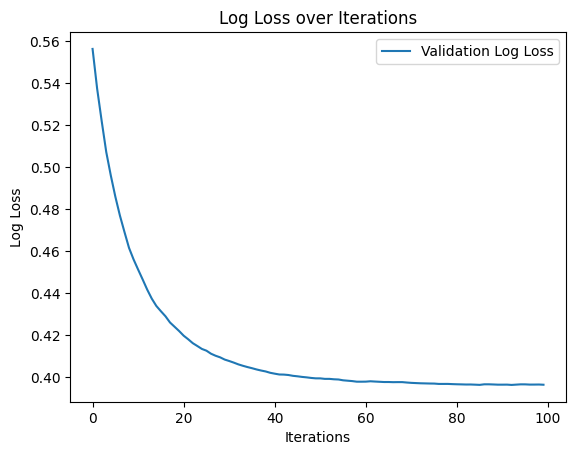

In [37]:
results = clf_xgb.evals_result()
plt.plot(results['validation_0']['logloss'], label='Validation Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8140525195173882


Evaluation Metrix

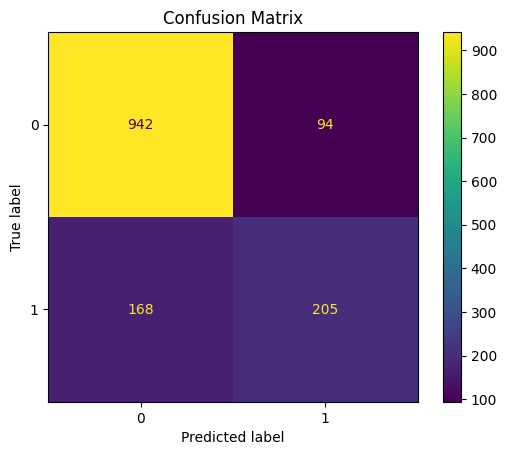

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

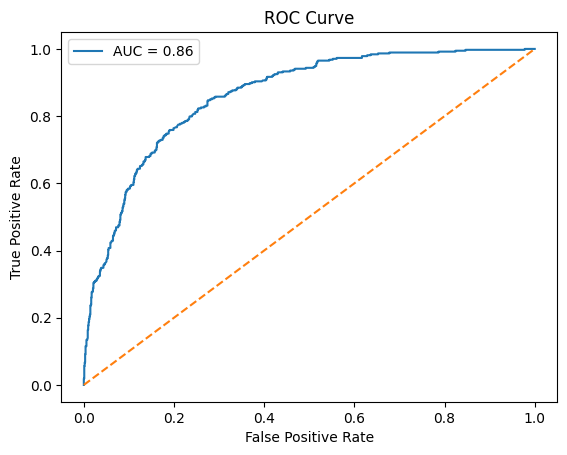

In [40]:
from sklearn.metrics import roc_curve, auc

y_proba = clf_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()